## Telecommunications Customer Churn Exploratory Data Analysis
### This project involves conducting an in-depth analysis of telecommunications company data to uncover valuable insights

### Data Processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Import data
df_telco = pd.read_csv('Telco_Customer.csv')
df_telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#reprocessing data
#Exclude Rows in 'TotalCharges' that contain white spaces
df_telco = df_telco.loc[~df_telco['TotalCharges'].str.contains(' ')]
#transform Dtype 'TotalCharges'col to float
df_telco['TotalCharges'] = df_telco['TotalCharges'].astype('float')

<ipython-input-4-994cb20a8d97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telco['TotalCharges'] = df_telco['TotalCharges'].astype('float')


In [ ]:
#check dtype after reprocessing data
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
#Checking null data
null_telco = df_telco.isnull().sum()
null_telco

#null value not found

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Check Duplicate Rows
duplicate_telco = df_telco.duplicated().sum()
duplicate_telco

#no duplicate rows found

0

##Statistic Summary


In [ ]:
#Statistic summary in df_telco data
df_telco.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


###Explanation

*   SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
*   tenure: Number of months the customer has stayed with the company
*   MonthlyCharges: The amount charged to the customer monthly
*   TotalCharges: The total amount charged to the customer

1. The mean value of tenure is 32.4, showing that customers, on average, stay for around 32 months using products and services from the telco company.
2. The average monthly charge imposed on customers reaches 64.7, and for the average total charge imposed on customers reaches 2283.3
3. Senior citizens are only described by (1,0), indicating it is not numerical data but categorical data, requiring different statistical analysis method.

In [ ]:
#Statistic summary with detailed percentiles in df_telco data
df_telco.describe(percentiles = [0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
10%,0.000000,2.000000,20.050000,84.600000
20%,0.000000,6.000000,25.050000,267.070000
30%,0.000000,12.000000,45.900000,551.995000
40%,0.000000,20.000000,58.920000,944.170000
50%,0.000000,29.000000,70.350000,1397.475000
60%,0.000000,40.000000,79.150000,2048.950000


Detailed percentile data reveals that 40% of customers have monthly charges equal to or lower than the average, while 60% of customers have total charges equal to or lower than the average.

In [ ]:
#Statistic summary for categorical data : SeniorCItizen, gender, and contract

#SeniorCitizen
count = df_telco['SeniorCitizen'].value_counts()# Calculate count for each categorical value
percentage = (count / len(df_telco)) * 100 # Calculate percentage for each value
mode_value = df_telco['SeniorCitizen'].mode().iloc[0]# Calculate mode (using mode because it categorical data)
SeniorCitizen__df = pd.DataFrame({'Count': count, 'Percentage': percentage, 'Mode': [mode_value] * len(count)}) # Create a DataFrame for the summary
SeniorCitizen__df.index.name = 'SeniorCitizen'# Rename the index

print(SeniorCitizen__df)


               Count  Percentage  Mode
SeniorCitizen                         
0               5890   83.759954     0
1               1142   16.240046     0


1 = Senior Citizen , 0 = Not senior citizen

The statistical summary shows that most of the customers are not senior citizens, with a percentage of 83.7%, and the mode also shows 0. This means that in the senior citizen column, mostly contains 0 (not senior citizens).


In [ ]:
#gender
count = df_telco['gender'].value_counts()# Calculate count for each categorical value
percentage = (count / len(df_telco)) * 100 # Calculate percentage for each value
mode_value = df_telco['gender'].mode().iloc[0]# Calculate mode (using mode because it categorical data)
gender__df = pd.DataFrame({'Count': count, 'Percentage': percentage, 'Mode': [mode_value] * len(count)}) # Create a DataFrame for the summary
gender__df.index.name = 'gender'# Rename the index

print(gender__df)

        Count  Percentage  Mode
gender                         
Male     3549   50.469283  Male
Female   3483   49.530717  Male


The statistical summary shows that most of the customers are Male, with a percentage of 50.4%, and the mode also shows Male. This means that male category

In [ ]:
#Contract
count = df_telco['Contract'].value_counts()# Calculate count for each categorical value
percentage = (count / len(df_telco)) * 100 # Calculate percentage for each value
mode_value = df_telco['Contract'].mode().iloc[0]# Calculate mode (using mode because it categorical data)
Contract__df = pd.DataFrame({'Count': count, 'Percentage': percentage, 'Mode': [mode_value] * len(count)}) # Create a DataFrame for the summary
Contract__df.index.name = 'Contract'# Rename the index

print(Contract__df)

                Count  Percentage            Mode
Contract                                         
Month-to-month   3875   55.105233  Month-to-month
Two year         1685   23.961889  Month-to-month
One year         1472   20.932878  Month-to-month


Contract: The contract term of the customer (Month-to-month, One year, Two year)

The statistical summary shows that most of the customers contract term is month to month, with a percentage of 55.1%.


##Univariat Analysis


<ipython-input-13-9d9a4b2724f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(


Text(0, 0.5, 'Contract Term')

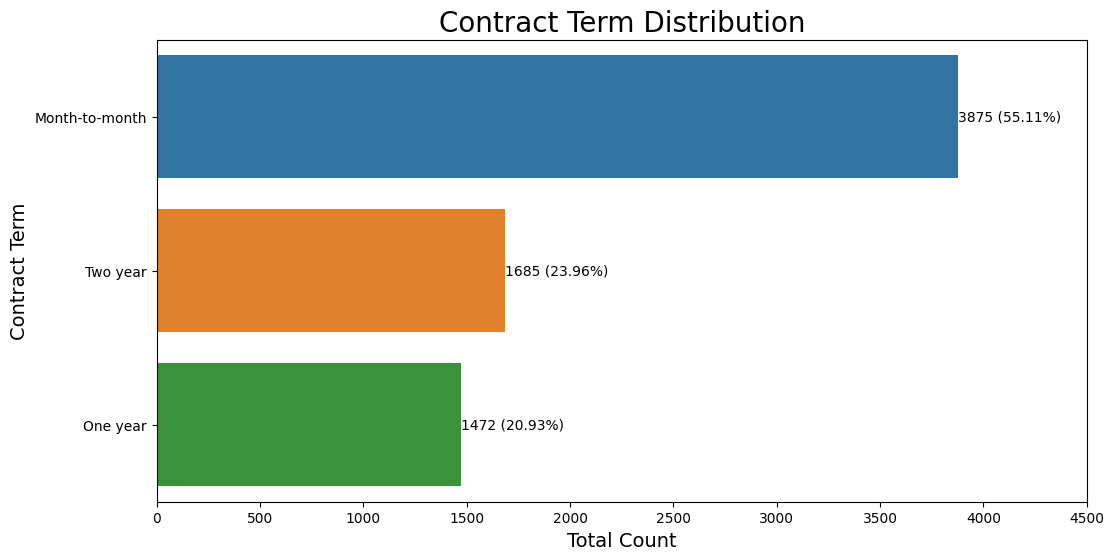

In [ ]:
#Univariat analysis of MonthlyCharges
fig = plt.figure(figsize=(12,6))

value_counts = df_telco['Contract'].value_counts(ascending=False)
percentages = (value_counts / value_counts.sum()) * 100


ax= sns.countplot(
    y= 'Contract',
    order=df_telco['Contract'].value_counts(ascending=False).index,
    palette="tab10",
    data=df_telco
)
#Label data
for i, (value, count) in enumerate(zip(value_counts, percentages)):
    ax.text(value, i, f'{value} ({count:.2f}%)', va='center')


plt.xticks(np.arange(0, 5000, step=500))
ax.set_title("Contract Term Distribution", size = 20)
ax.set_xlabel("Total Count", size = 14)
ax.set_ylabel("Contract Term", size = 14)

##Univariate analysis on contract term reveals that customers prefer "Month-to-month" contracts, which account for 3,875 customers, constituting 55.11% of the total customer base.

Text(0.5, 1.0, 'Total Charge')

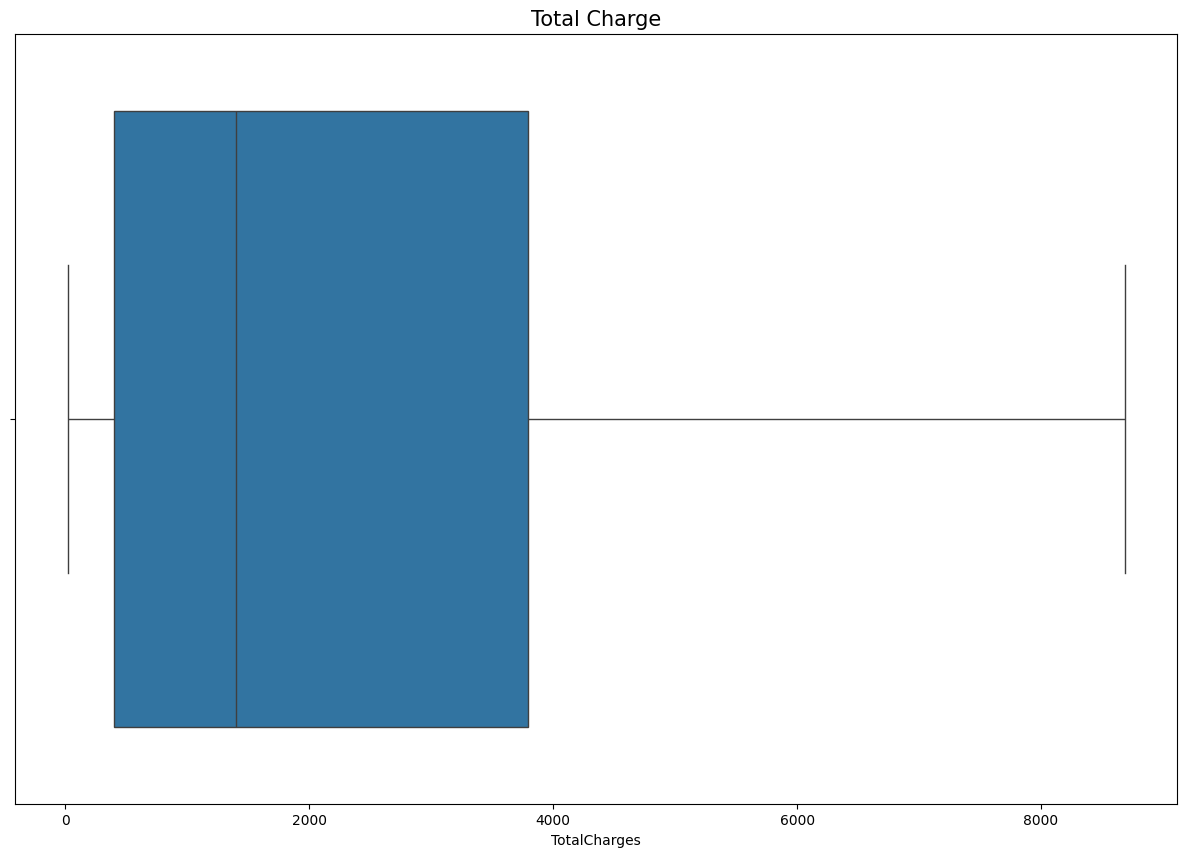

In [ ]:
#Univariat analysis of Total Charge
fig, ax = plt.subplots(figsize=(15, 10))


ax = sns.boxplot(
    x="TotalCharges",
    data=df_telco,

)
ax.set_title("Total Charge",size = 15)

##The distribution of total charges among Telco customers is well spread out and shows no outliers.

##Multivariat Analysis


In [ ]:
data = df_telco[['tenure','MonthlyCharges','TotalCharges']]
correlation = data.corr()
correlation

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


<Axes: >

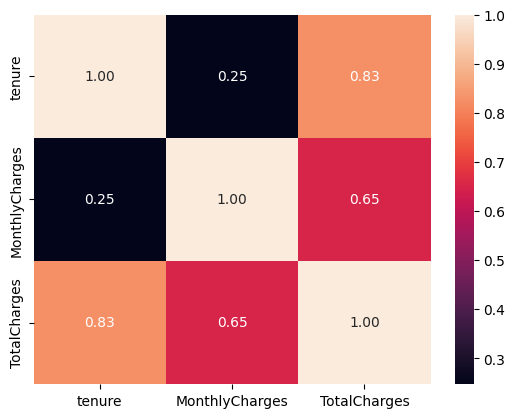

In [ ]:
sns.heatmap(correlation, annot=True, fmt='.2f')


## 1.correlation coefficient of 0.85 between tenure and total charges indicates a strong positive correlation. This suggests that there is a substantial relationship between the length of time a customer has been with the service provider (tenure) and the total charges incurred by that customer. In this case, as tenure increases, total charges also tend to increase significantly.

## 2.correlation coefficient of 0.25 between tenure and monthly charges indicates a positive correlation, albeit a relatively weak one. This means that there is a tendency for customers with longer tenure (i.e., the length of time they have been with the service provider) to have slightly higher monthly charges. However, it's essential to note that the correlation coefficient of 0.25 suggests that the relationship between tenure and monthly charges is not very strong

##Exploration Questions
1. Do dependents and age (Senior Citizen status) influence the Amount of Churn?

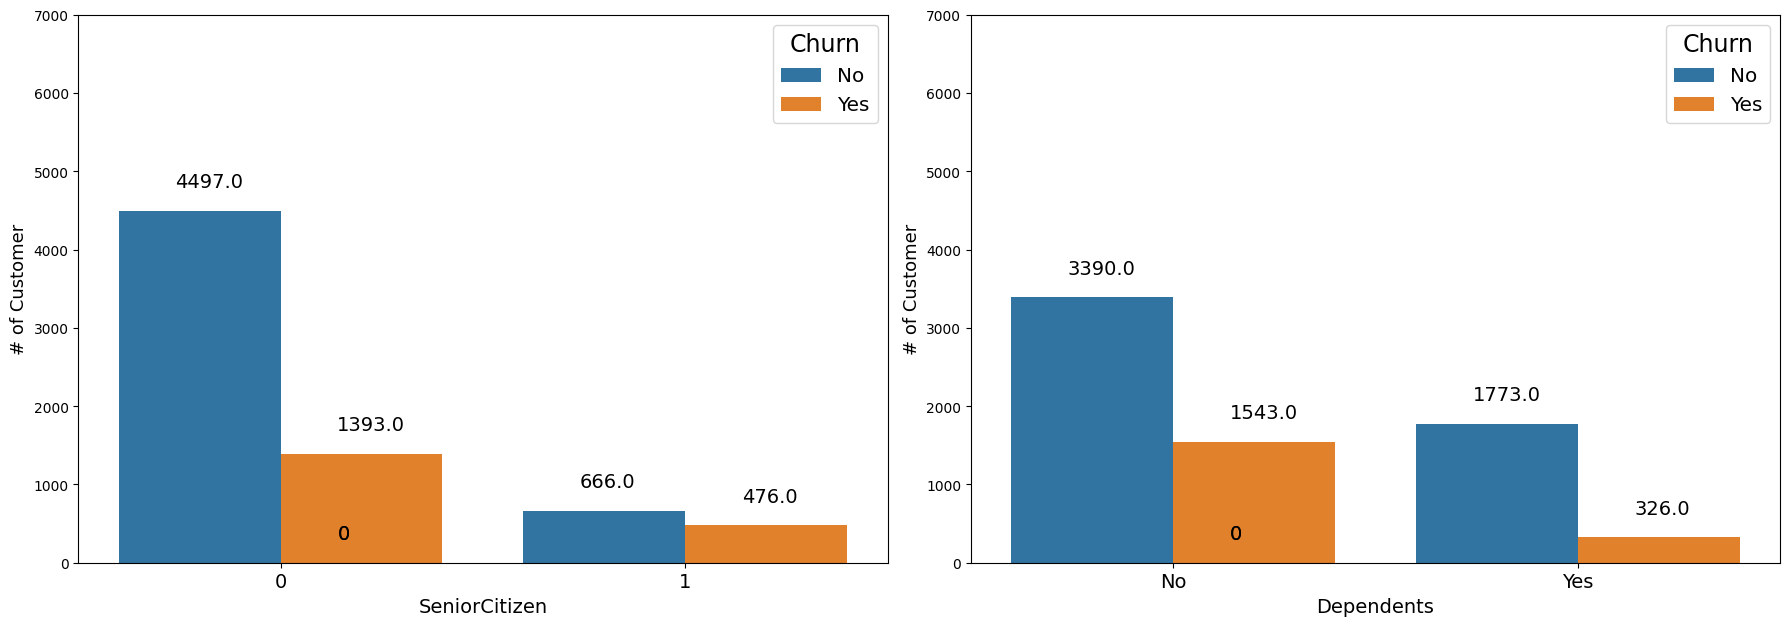

In [ ]:
Variable = ['SeniorCitizen','Dependents']
plt.figure(figsize=(18,12))

for i,col in enumerate(Variable):
    plt.subplot(2,2,i + 1)

    ax = sns.countplot(data = df_telco, x = col, hue="Churn", palette = 'tab10')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Customer", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()



First, we explore the number of churned customers based on their Senior Citizen status and Dependents separately. From our exploration, we can conclude the following:

1. Overall, the number of non-churned customers is higher in both groups compared to the number of churned customers.
2. Among customers without dependents, the number of churned customers is higher than among customers with dependents. Additionally, within the group without senior citizen status, exhibit a higher number of churned customers compared to those with senior citizen status.

Following this analysis, let's delve deeper into the influence of dependents and senior citizen status on the number of churned customers.

In [ ]:
churn_yes = df_telco[df_telco['Churn']== 'Yes'] #filter only churn customer

df_churn_yes=churn_yes.groupby(['SeniorCitizen','Dependents','Churn']).agg({
                                'Churn':['count']
                                }) #create new agg table


df_churn_yes

Churn
                               count
SeniorCitizen Dependents Churn      
0             No         Yes    1089
              Yes        Yes     304
1             No         Yes     454
              Yes        Yes      22

<ipython-input-34-b6324d955ed5>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_churn_yes, x='SeniorCitizen', y=('Churn', 'count'), hue='Dependents', ci=None)


1089.0
454.0
304.0
22.0
0
0


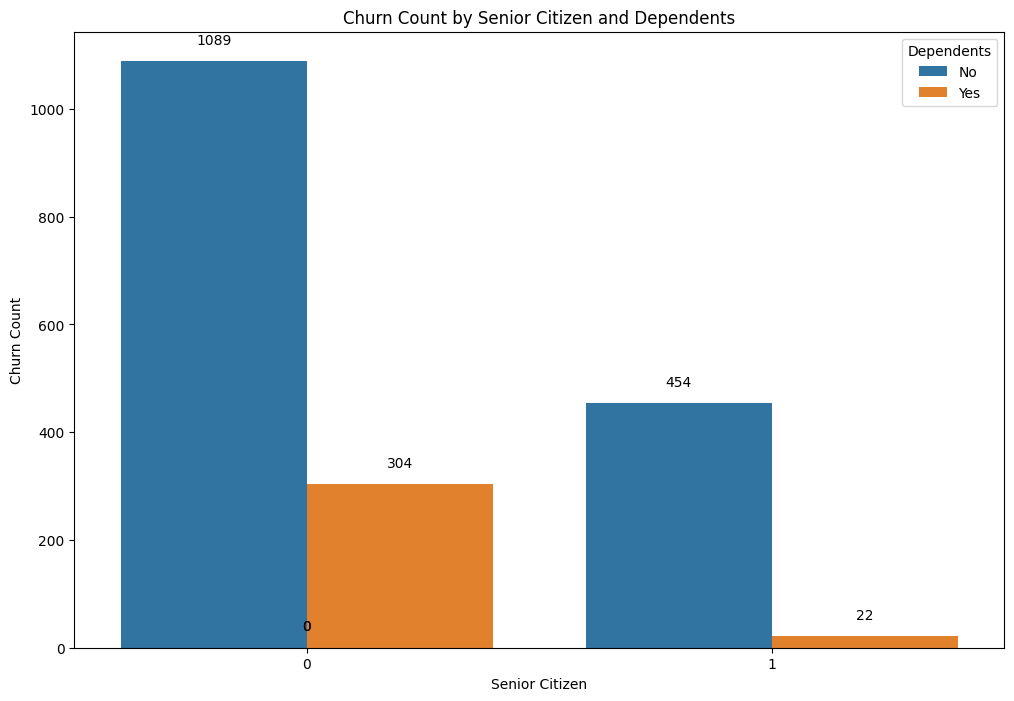

In [ ]:
plt.figure(figsize=(12,8))

# Create Seaborn barplot
ax = sns.barplot(data=df_churn_yes, x='SeniorCitizen', y=('Churn', 'count'), hue='Dependents', ci=None)
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Count')
plt.title('Churn Count by Senior Citizen and Dependents')
plt.legend(title='Dependents')

# Add value labels to the bars
for p in ax.patches:
    print(p.get_height())  # Debugging print statement
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()


##Overall, customers without dependents exhibit a higher churn count, irrespective of their senior citizen status. Specifically, customers without senior citizen status and no dependents represent the segment with the highest churn rate, reaching 1089 churned customers.


Given that customers without dependents exhibit a higher churn count, let's focus on this segment to assess their contribution as customers.

2.Do churned customers in the no dependents group have a higher average total charges and total customer count compared to non-churned customers?


In [ ]:
dependents_no = df_telco[df_telco['Dependents']== 'No']

df_dependents_no=dependents_no.groupby(['Dependents','Churn']).agg({
                                'Churn':['count'],
                                'TotalCharges':['mean']
                                })


df_dependents_no

Churn TotalCharges
                 count         mean
Dependents Churn                   
No         No     3390  2516.262478
           Yes    1543  1465.871646

##In the no dependents customer group, the number of non-churned customers is higher than that of churned customers, and the non-churned customers have a higher average TotalCharges. This indicates that churned customers in the no dependents group are not big spenders, as evidenced by their lower average total charges compared to non-churned customers.